# Import Data Set

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\lenovo\Desktop\ExcelR\CSV files\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [5]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           6.02e-19
Time:                        18:57:49   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

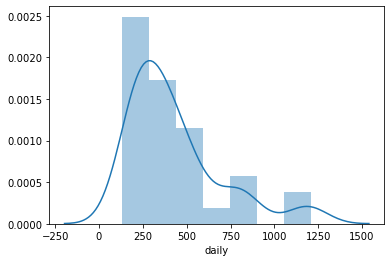

In [6]:
import seaborn as sns
sns.distplot(data['daily'])

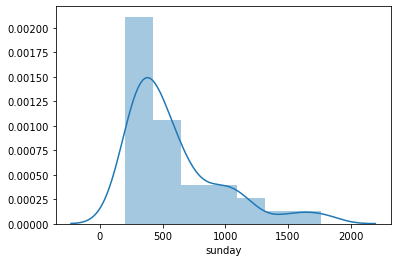

In [7]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

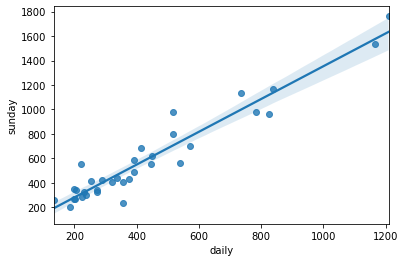

In [9]:
sns.regplot(x="daily", y="sunday", data=data);

In [10]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [13]:
sunday = model.params[0]+model.params[1]*200
sunday

281.7785814464613

In [15]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [16]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [17]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [27]:
dataC = pd.Series([210,420,322,620,864,531])
dataC

0    210
1    420
2    322
3    620
4    864
5    531
dtype: int64

In [28]:
dataC = pd.DataFrame(data = dataC,columns=['daily'])
dataC

,daily
0,210
1,420
2,322
3,620
4,864
5,531


In [29]:
model.predict(dataC)

0     295.175729
1     576.515828
2     445.223782
3     844.458780
4    1171.349181
5     725.224166
dtype: float64